In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx

In [3]:
# Read the dataset
df_bg = pd.read_csv('DAAN545_bg_pseudo.csv',nrows=20000)

In [4]:
df_bg.shape

(20000, 648)

In [5]:
# Each row represents a job advertisement. 
# Each column represents a skill required in the job.

df_bg.head(5)

,Account Management,Accounting Services Industry Knowledge,Accounting and Finance Software,Accounts Payable and Receivable,Actuarial Science,Ad Hoc Analysis and Reporting,Administrative Support,Administrative and Business Support Industry Knowledge,Advanced Customer Service,Advanced Microsoft Excel,...,Web Content,Web Design,Web Development,Web Servers,Welding,Wiki,Wind Energy,Wood Products Industry Knowledge,Writing,iOS Stack
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df_bg.copy()
df.columns
df

,Account Management,Accounting Services Industry Knowledge,Accounting and Finance Software,Accounts Payable and Receivable,Actuarial Science,Ad Hoc Analysis and Reporting,Administrative Support,Administrative and Business Support Industry Knowledge,Advanced Customer Service,Advanced Microsoft Excel,...,Web Content,Web Design,Web Development,Web Servers,Welding,Wiki,Wind Energy,Wood Products Industry Knowledge,Writing,iOS Stack
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#### Data Cleaning
#### df.describe gives a breif statistics about the dataframe
df.describe()
###### df.isnull().any() check if columns is empty and by adding other .any() it will consieses the column and return a single value if false then NULL 
df.isnull().any()

Account Management                        False
Accounting Services Industry Knowledge    False
Accounting and Finance Software           False
Accounts Payable and Receivable           False
Actuarial Science                         False
                                          ...  
Wiki                                      False
Wind Energy                               False
Wood Products Industry Knowledge          False
Writing                                   False
iOS Stack                                 False
Length: 648, dtype: bool

In [8]:
##### To generate descriptive statistics
df.describe()
##### This code is for generating all the values of sum and storing in the dictinoary which is created example 'A' : 6 , 'B' : 7 and soo on 
list2 = {}
list1 = list(df.columns)
for i in list1:
    count = df[i].sum()
    list2[i] = int(count)
list2

{'Account Management': 887,
 'Accounting Services Industry Knowledge': 463,
 'Accounting and Finance Software': 896,
 'Accounts Payable and Receivable': 644,
 'Actuarial Science': 424,
 'Ad Hoc Analysis and Reporting': 514,
 'Administrative Support': 2792,
 'Administrative and Business Support Industry Knowledge': 451,
 'Advanced Customer Service': 1076,
 'Advanced Microsoft Excel': 605,
 'Advanced Patient Care': 1332,
 'Advertising': 568,
 'Advertising Industry Knowledge': 433,
 'Aerospace Engineering': 474,
 'Agricultural Chemicals Industry Knowledge': 465,
 'Agricultural Industry Knowledge': 485,
 'Agricultural Research': 468,
 'Agronomy and Farming': 558,
 'Air Quality': 455,
 'Air Transport': 551,
 'Air Transportation Industry Knowledge': 452,
 'Aircraft Repair Industry Knowledge': 456,
 'Allergies': 488,
 'Allied Health Care Industry Knowledge': 459,
 'Alternative Therapy': 559,
 'Aluminum Industry Knowledge': 446,
 'Ammunition Industry Knowledge': 452,
 'Analog Design': 436,
 'A

In [9]:
##### To sort in such a way that we get the top 10 required skills 
######## list2.items(), key=lambda item: item[1], reverse= True)) first the dictionary is sorted and  combines the string value of dict with and the sum value  
######## Once the value is appended the items are then reversed such that we dont need to create another loop where the index goes to last value
######## But we get to splice the first 10 value of the dict
list_10 = dict(sorted(list2.items(), key=lambda item: item[1], reverse= True)[:10])
list_10

{'Basic Customer Service': 7979,
 'General Sales': 6186,
 'Microsoft Office and Productivity Tools': 4701,
 'Scheduling': 4129,
 'General Sales Practices': 3314,
 'General Administrative and Clerical Tasks': 3117,
 'Retail Industry Knowledge': 3004,
 'Administrative Support': 2792,
 'Budget Management': 2581,
 'People Management': 2386}

In [10]:
freq_items = apriori(df, min_support=0.05, use_colnames=True, verbose=1) 
freq_items

d:\anoconda\envs\datamining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 136 combinations | Sampling itemset size 43


,support,itemsets
0,0.13960,(Administrative Support)
1,0.05380,(Advanced Customer Service)
2,0.06660,(Advanced Patient Care)
3,0.39895,(Basic Customer Service)
4,0.07280,(Basic Living Activities Support)
...,...,...
130,0.05365,"(Basic Customer Service, Microsoft Office and ..."
131,0.06870,"(Retail Industry Knowledge, General Sales Prac..."
132,0.05660,"(Retail Industry Knowledge, Inventory Manageme..."
133,0.06330,"(Retail Industry Knowledge, General Sales Prac..."


In [11]:
###### This is to create the rules where example A -> B , {B,C -> A} , {C -> B}  This gives us antecedents which is the LHS and consequents which is RHS
##### and a detailed metrices of support confidence lift and leverage
rules = association_rules(freq_items , metric='confidence' , min_threshold=0.5)
rules
##### Using these rules a netwrok graph is created using NODE where each Node represents Antecdents

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Administrative Support),(Basic Customer Service),0.13960,0.39895,0.08050,0.576648,1.445413,0.024807,1.419739,0.358155
1,(Billing and Invoicing),(Basic Customer Service),0.10235,0.39895,0.05770,0.563752,1.413089,0.016867,1.377771,0.325662
2,(Budget Management),(Basic Customer Service),0.12905,0.39895,0.06730,0.521503,1.307190,0.015816,1.256121,0.269820
3,(Customer Relationship Management (CRM)),(Basic Customer Service),0.08865,0.39895,0.05075,0.572476,1.434957,0.015383,1.405886,0.332600
4,(General Administrative and Clerical Tasks),(Basic Customer Service),0.15585,0.39895,0.08960,0.574912,1.441062,0.027424,1.413942,0.362575
...,...,...,...,...,...,...,...,...,...,...
76,"(Basic Customer Service, Inventory Management,...",(Retail Industry Knowledge),0.06660,0.15020,0.05430,0.815315,5.428198,0.044297,4.601356,0.873984
77,"(Retail Industry Knowledge, Inventory Management)","(Basic Customer Service, General Sales)",0.06180,0.19890,0.05430,0.878641,4.417500,0.042008,6.601064,0.824587
78,"(Retail Industry Knowledge, General Sales)","(Basic Customer Service, Inventory Management)",0.10535,0.08275,0.05430,0.515425,6.228698,0.045582,1.892895,0.938303
79,"(Basic Customer Service, Inventory Management)","(Retail Industry Knowledge, General Sales)",0.08275,0.10535,0.05430,0.656193,6.228698,0.045582,2.602189,0.915184


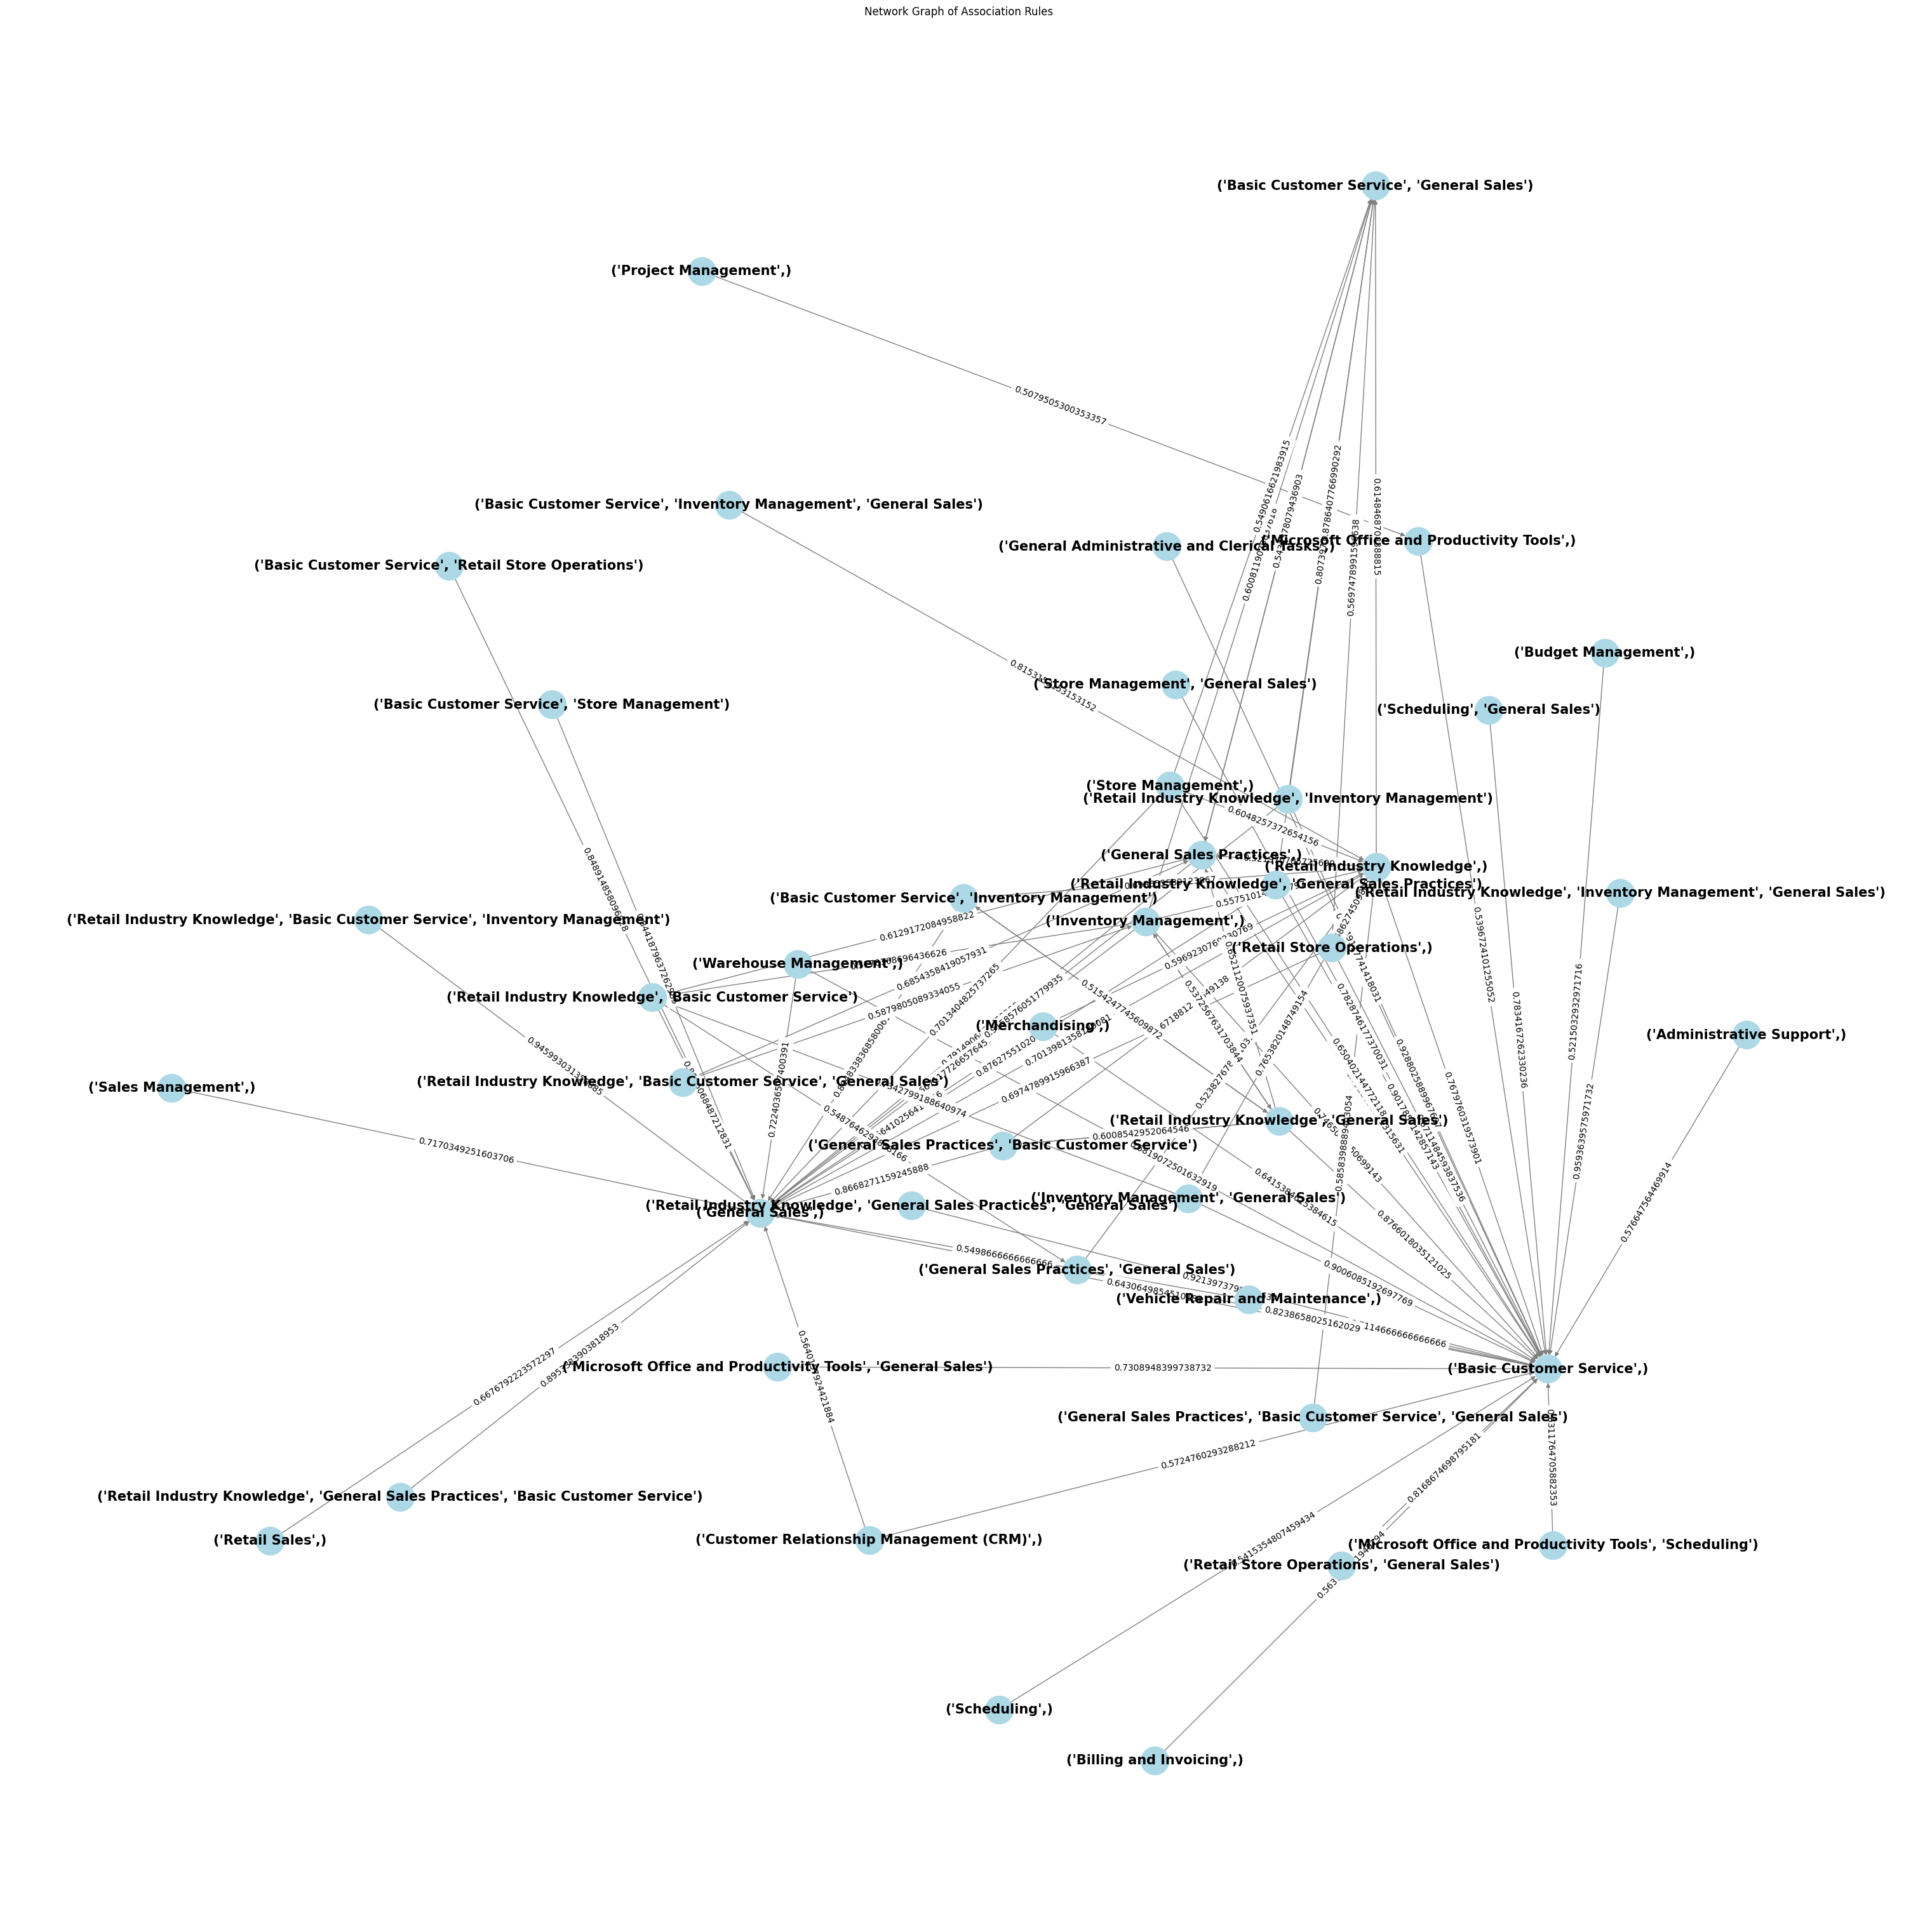

In [12]:
##### TO build a network map we use networkx package which gives us an option to use the rules 
# P here is created to generate an directed graph 
p = nx.DiGraph()
# Adding edges to the graph which is derived by the rules that is being generated with the help of apriori and other metriecs   
for idx , rule in rules.iterrows():
    antecedents = tuple(rule['antecedents']) 
    consequents = tuple(rule['consequents'])
    confidence = rule['confidence']
    p.add_edge(antecedents, consequents, weight = confidence)
# Adjust the size of the plot graph
plt.figure(figsize=(30,30))
pos = nx.spring_layout(p, k = 0.5 , iterations=50)
#Draw the graph
nx.draw(p,pos,with_labels = True , node_size = 1000, node_color = 'lightblue',font_size = 15, font_weight = 'bold',edge_color='grey')
edge_labels = nx.get_edge_attributes(p, 'weight')
nx.draw_networkx_edge_labels(p, pos, edge_labels=edge_labels)
plt.title('Network Graph of Association Rules')
plt.show()

d:\anoconda\envs\datamining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 42 combinations | Sampling itemset size 32


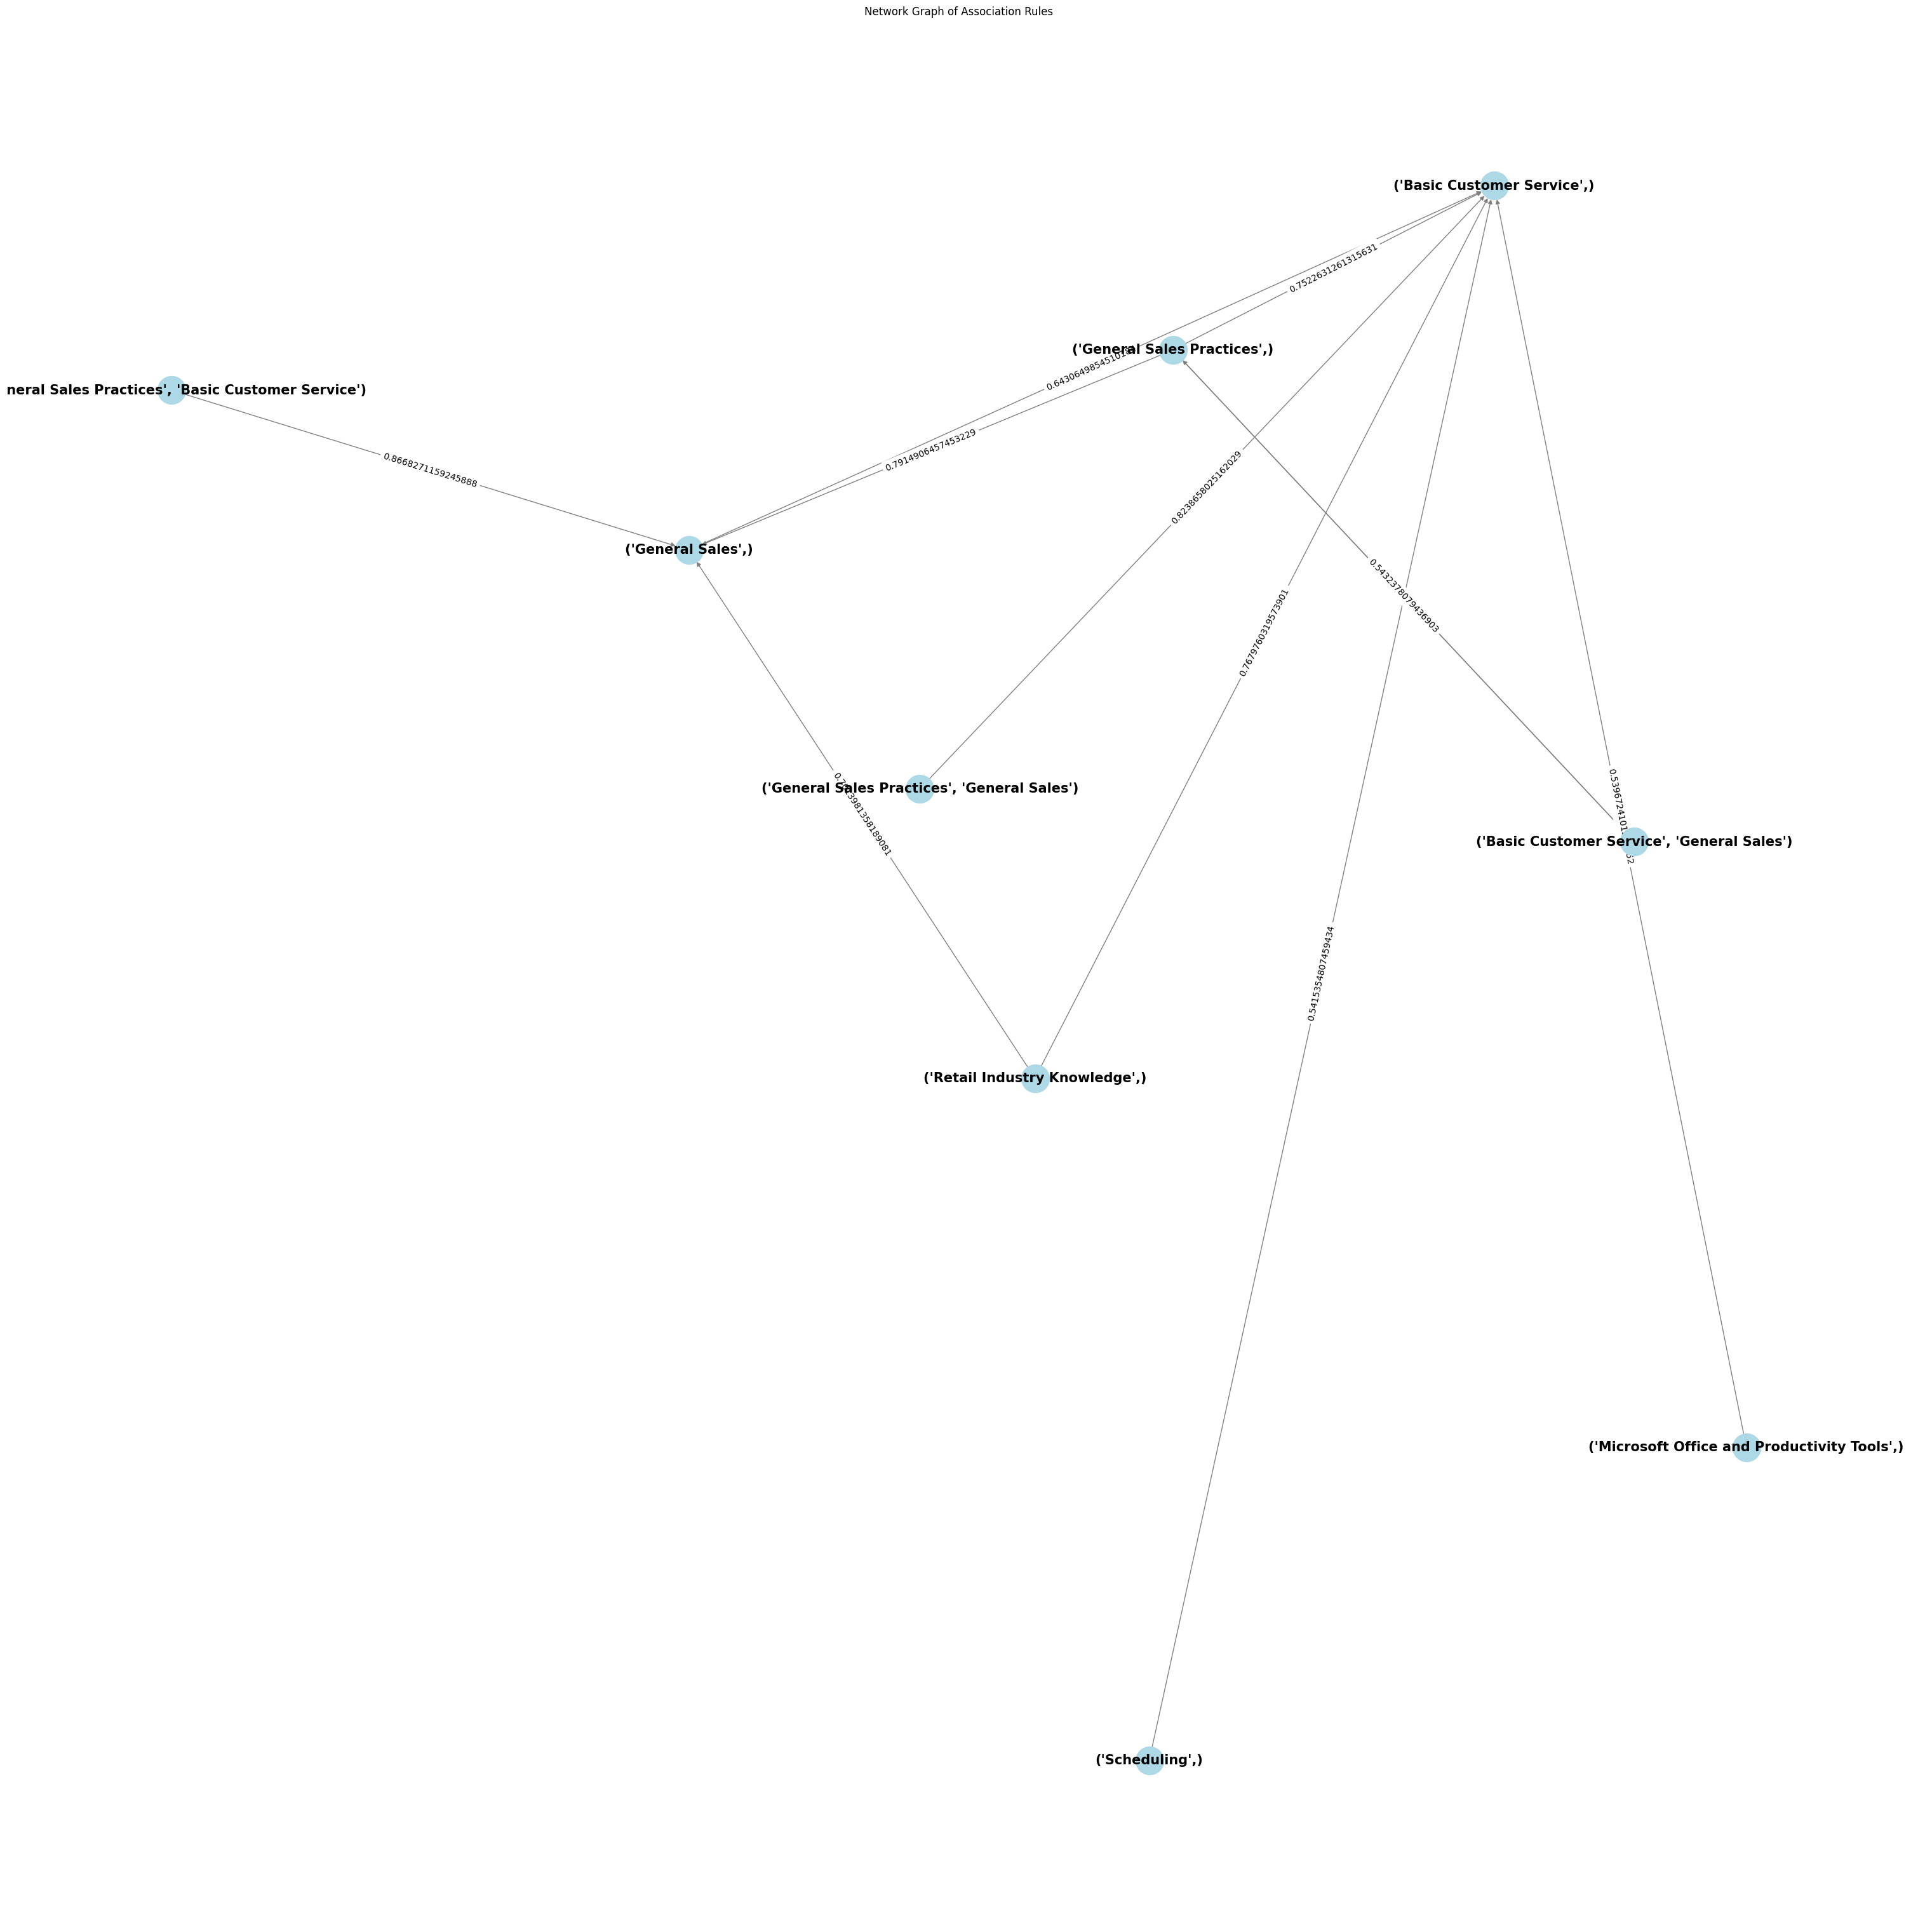

In [13]:
# Changing the min_support 
freq_items = apriori(df, min_support=0.10, use_colnames=True, verbose=1) 
rules = association_rules(freq_items , metric='confidence' , min_threshold=0.5)
p = nx.DiGraph()
for idx , rule in rules.iterrows():
    antecedents = tuple(rule['antecedents']) 
    consequents = tuple(rule['consequents'])
    confidence = rule['confidence']
    p.add_edge(antecedents, consequents, weight = confidence)
plt.figure(figsize=(30,30))
pos = nx.spring_layout(p, k = 0.5 , iterations=50)
nx.draw(p,pos,with_labels = True , node_size = 1000, node_color = 'lightblue',font_size = 15, font_weight = 'bold',edge_color='grey')
edge_labels = nx.get_edge_attributes(p, 'weight')
nx.draw_networkx_edge_labels(p, pos, edge_labels=edge_labels)
plt.title('Network Graph of Association Rules')
plt.show()

In [14]:
pd.set_option('display.max_colwidth', None)
freq_items #### This items is for min_support of 0.10

,support,itemsets
0,0.13960,(Administrative Support)
1,0.39895,(Basic Customer Service)
2,0.10235,(Billing and Invoicing)
3,0.12905,(Budget Management)
4,0.10525,(Business Process and Analysis)
5,0.15585,(General Administrative and Clerical Tasks)
6,0.30930,(General Sales)
7,0.16570,(General Sales Practices)
8,0.11085,(Inventory Management)
9,0.23505,(Microsoft Office and Productivity Tools)


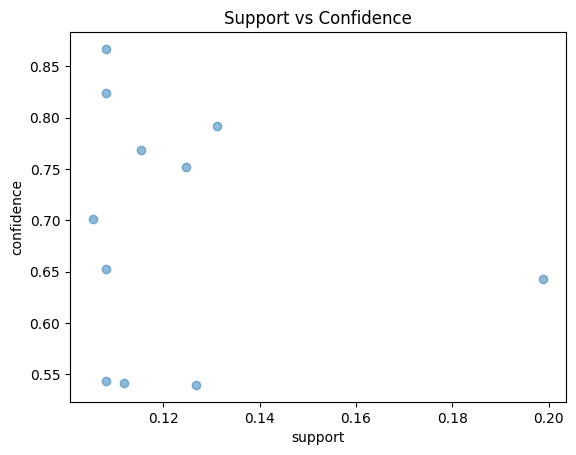

In [15]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

d:\anoconda\envs\datamining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


14 itemset(s) from tree conditioned on items ()
1 itemset(s) from tree conditioned on items (Scheduling)
0 itemset(s) from tree conditioned on items (Inventory Management)
0 itemset(s) from tree conditioned on items (Budget Management)
0 itemset(s) from tree conditioned on items (Project Management)
0 itemset(s) from tree conditioned on items (Business Process and Analysis)
0 itemset(s) from tree conditioned on items (Basic Customer Service)
2 itemset(s) from tree conditioned on items (General Sales Practices)
1 itemset(s) from tree conditioned on items (General Sales Practices, Basic Customer Service)
0 itemset(s) from tree conditioned on items (General Sales Practices, General Sales)
2 itemset(s) from tree conditioned on items (Retail Industry Knowledge)
0 itemset(s) from tree conditioned on items (Retail Industry Knowledge, Basic Customer Service)
0 itemset(s) from tree conditioned on items (Retail Industry Knowledge, General Sales)
0 itemset(s) from tree conditioned on items (Admin

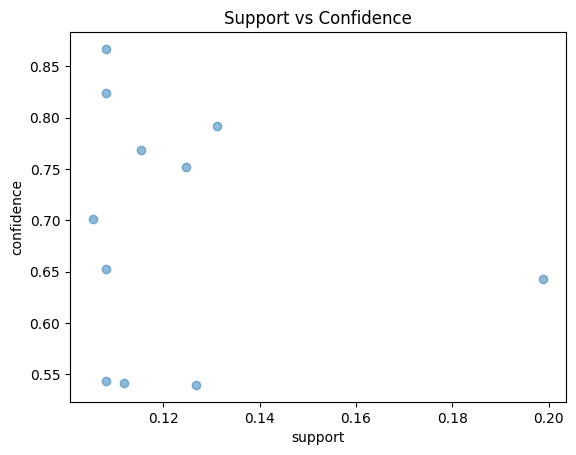

In [16]:
#### Using fpgrowth rather than aprori to obtain 
freq_items = fpgrowth(df,min_support= 0.10,use_colnames=True, verbose=1)
rules = association_rules(freq_items , metric='confidence' , min_threshold=0.5)
pd.set_option('display.max_colwidth', None)
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()
### Both the aprori and fpgrowth shows the same result for min_support set to 0.10

Processing 6 combinations | Sampling itemset size 65432


d:\anoconda\envs\datamining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


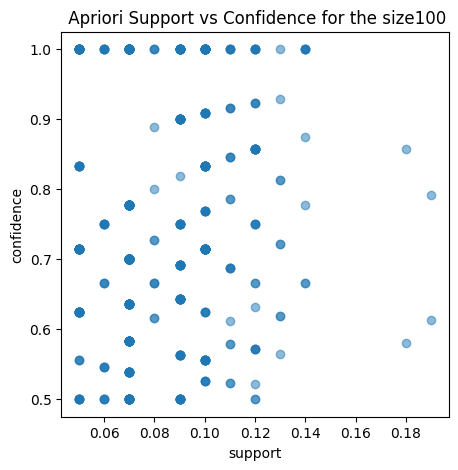

d:\anoconda\envs\datamining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


137 itemset(s) from tree conditioned on items ()
1 itemset(s) from tree conditioned on items (Social Media)
5 itemset(s) from tree conditioned on items (Brand Management)
0 itemset(s) from tree conditioned on items (Brand Management, Social Media)
0 itemset(s) from tree conditioned on items (Brand Management, General Sales)
0 itemset(s) from tree conditioned on items (Brand Management, Microsoft Office and Productivity Tools)
1 itemset(s) from tree conditioned on items (Brand Management, Scheduling)
1 itemset(s) from tree conditioned on items (Brand Management, Basic Customer Service)
1 itemset(s) from tree conditioned on items (Basic Patient Care)
0 itemset(s) from tree conditioned on items (JavaScript and jQuery)
1 itemset(s) from tree conditioned on items (Operating Systems)
0 itemset(s) from tree conditioned on items (Surveillance)
0 itemset(s) from tree conditioned on items (Market Analysis)
1 itemset(s) from tree conditioned on items (Journalism)
2 itemset(s) from tree conditione

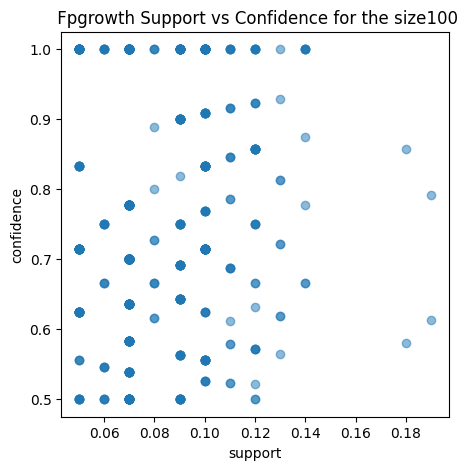

d:\anoconda\envs\datamining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 85 combinations | Sampling itemset size 542


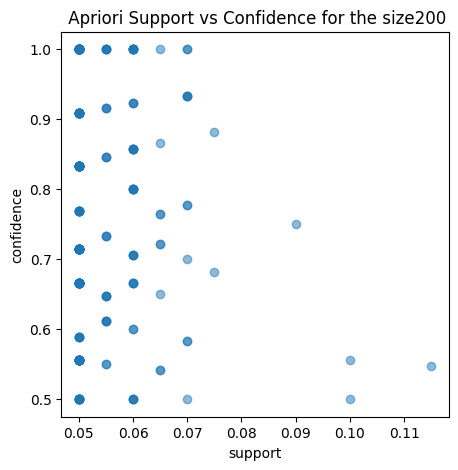

d:\anoconda\envs\datamining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


87 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (JavaScript and jQuery)
2 itemset(s) from tree conditioned on items (Graphic and Visual Design Software)
0 itemset(s) from tree conditioned on items (Graphic and Visual Design Software, JavaScript and jQuery)
0 itemset(s) from tree conditioned on items (Graphic and Visual Design Software, Project Management)
0 itemset(s) from tree conditioned on items (Social Media)
0 itemset(s) from tree conditioned on items (Journalism)
0 itemset(s) from tree conditioned on items (Brand Management)
0 itemset(s) from tree conditioned on items (Basic Patient Care)
7 itemset(s) from tree conditioned on items (Content Development and Management)
0 itemset(s) from tree conditioned on items (Operating Systems)
0 itemset(s) from tree conditioned on items (Market Analysis)
3 itemset(s) from tree conditioned on items (Scheduling)
0 itemset(s) from tree conditioned on items (Scheduling, Basic Customer Service)
0 itemset

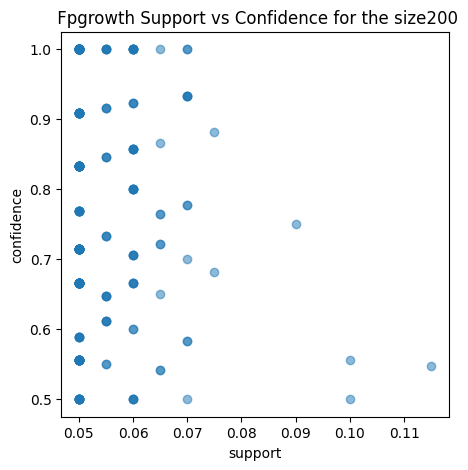

d:\anoconda\envs\datamining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 312 combinations | Sampling itemset size 32


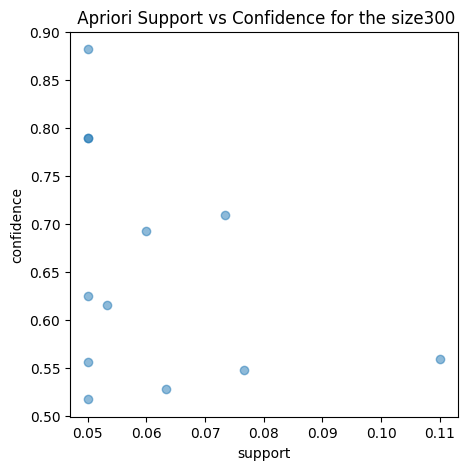

d:\anoconda\envs\datamining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


85 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (JavaScript and jQuery)
1 itemset(s) from tree conditioned on items (Graphic and Visual Design Software)
0 itemset(s) from tree conditioned on items (Hand Tools)
0 itemset(s) from tree conditioned on items (Social Media)
0 itemset(s) from tree conditioned on items (Journalism)
0 itemset(s) from tree conditioned on items (Operating Systems)
0 itemset(s) from tree conditioned on items (Basic Patient Care)
0 itemset(s) from tree conditioned on items (Brand Management)
0 itemset(s) from tree conditioned on items (Content Development and Management)
2 itemset(s) from tree conditioned on items (Scheduling)
0 itemset(s) from tree conditioned on items (Scheduling, Basic Customer Service)
0 itemset(s) from tree conditioned on items (Scheduling, Microsoft Office and Productivity Tools)
0 itemset(s) from tree conditioned on items (Financial Management)
0 itemset(s) from tree conditioned on items (Vehicle R

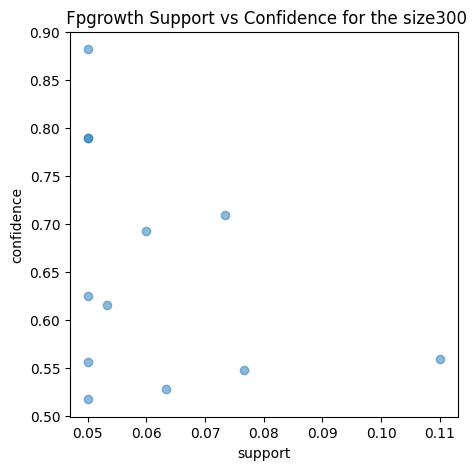

d:\anoconda\envs\datamining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 114 combinations | Sampling itemset size 32


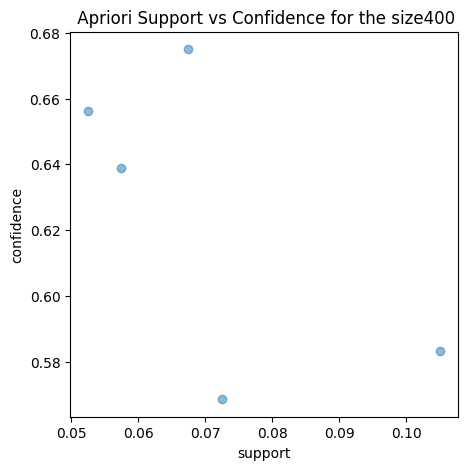

d:\anoconda\envs\datamining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


83 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (JavaScript and jQuery)
0 itemset(s) from tree conditioned on items (Graphic and Visual Design Software)
0 itemset(s) from tree conditioned on items (Social Media)
0 itemset(s) from tree conditioned on items (Basic Patient Care)
0 itemset(s) from tree conditioned on items (Operating Systems)
0 itemset(s) from tree conditioned on items (Hand Tools)
0 itemset(s) from tree conditioned on items (Content Development and Management)
0 itemset(s) from tree conditioned on items (Market Analysis)
0 itemset(s) from tree conditioned on items (Brand Management)
0 itemset(s) from tree conditioned on items (Journalism)
2 itemset(s) from tree conditioned on items (Scheduling)
0 itemset(s) from tree conditioned on items (Scheduling, Basic Customer Service)
0 itemset(s) from tree conditioned on items (Scheduling, Microsoft Office and Productivity Tools)
0 itemset(s) from tree conditioned on items (Financial Mana

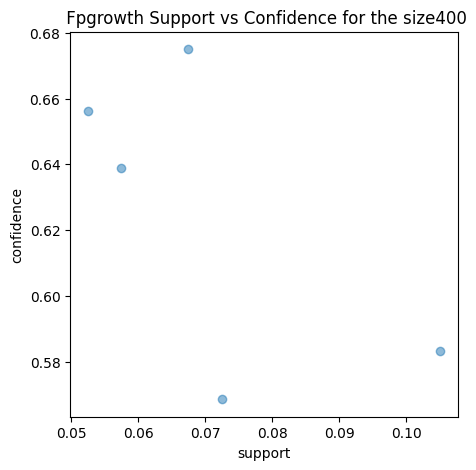

In [17]:
### By saturating the sample to various sizes
list1 = [100,200,300,400]
for i in list1:
    df_temp = df.head(i)
    freq_items = apriori(df_temp, min_support=0.05, use_colnames=True, verbose=1)
    rules = association_rules(freq_items , metric='confidence' , min_threshold=0.5)
    pd.set_option('display.max_colwidth', None)
    plt.figure(figsize=(5 , 5))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(f" Apriori Support vs Confidence for the size{i}")
    plt.show() 
    freq_items = fpgrowth(df_temp, min_support=0.05, use_colnames=True, verbose=1)
    rules = association_rules(freq_items , metric='confidence' , min_threshold=0.5)
    pd.set_option('display.max_colwidth', None)
    plt.figure(figsize=(5 , 5))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(f" Fpgrowth Support vs Confidence for the size{i}")
    plt.show() 
# The speed of FPGROWTH > Apriori  Since Aprior uses BFS compared to FPGrowth which uses DFS Search and as we know that DFS > BFS
# The graph looks higer order Polynomial  